In [5]:
import center_algorithms as ca
import numpy as np
from matplotlib import pyplot as plt

import pandas as pd

from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler

In [32]:
def do_pca(x, labels):
    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(x)
    principalDf = pd.DataFrame(data = principalComponents
                , columns = ['principal component 1', 'principal component 2'])
    finalDf = pd.concat([principalDf, labels], axis = 1)
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.set_title('2 component PCA', fontsize = 20)
    targets = [0,1,2,3,4,5,6,7,8,9]
    colors = ['tab:red', 'tab:green', 'tab:blue', 'tab:brown', 'tab:olive', 'tab:orange', 'tab:pink', 'tab:grey', 'tab:cyan', 'tab:purple']
    for target, color in zip(targets,colors):
        indicesToKeep = finalDf['target'] == target
        ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
                , finalDf.loc[indicesToKeep, 'principal component 2']
                , c = color
                , s = 50)
    ax.legend(targets)
    ax.grid()

def do_3d_pca(x, labels):
    labels = np.array(labels)
    pca = PCA(n_components=3)
    principalComponents = pca.fit_transform(x)
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    for l in np.unique(labels):
        idx = np.where(labels == l)
        ax.scatter(principalComponents[idx,0], principalComponents[idx,1], principalComponents[idx,2])
    

In [36]:
def do_flag_median(x, labels):
    data = []
    for pt in x:
        data.append(np.expand_dims(pt, axis = 1))

    print(len(data))

    flag_median, err = ca.irls_flag(data, 2, 50, 'sine', opt_err = 'geodesic', init = 'random', seed = 10)
    plt.figure()
    plt.plot(err)

    transformed_data = x @ flag_median

    principalDf = pd.DataFrame(data = transformed_data
                , columns = ['flag median component 1', 'flag median component 2'])
    finalDf = pd.concat([principalDf, labels], axis = 1)
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('flag median Component 1', fontsize = 15)
    ax.set_ylabel('flag median Component 2', fontsize = 15)
    ax.set_title('2 component PCA', fontsize = 20)
    targets = [0,1,2,3,4,5,6,7,8,9]
    colors = ['tab:red', 'tab:green', 'tab:blue', 'tab:brown', 'tab:olive', 'tab:orange', 'tab:pink', 'tab:grey', 'tab:cyan', 'tab:purple']
    for target, color in zip(targets,colors):
        indicesToKeep = finalDf['target'] == target
        ax.scatter(finalDf.loc[indicesToKeep, 'flag median component 1']
                , finalDf.loc[indicesToKeep, 'flag median component 2']
                , c = color
                , s = 50)
    ax.legend(targets)
    ax.grid()

def do_3d_flag_median(x, labels):
    data = []
    for pt in x:
        data.append(np.expand_dims(pt, axis = 1))

    print(len(data))

    flag_median, err = ca.irls_flag(data, 3, 50, 'sine', opt_err = 'geodesic', init = 'random', seed = 10)
    plt.figure()
    plt.plot(err)

    transformed_data = x @ flag_median

    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    for l in np.unique(labels):
        idx = np.where(labels == l)
        ax.scatter( transformed_data[idx,0], transformed_data[idx,1], transformed_data[idx,2])

In [8]:

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

In [9]:

features = ['sepal length', 'sepal width', 'petal length', 'petal width']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['target']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [10]:
x.shape

(150, 4)

In [11]:
targets = pd.DataFrame(df['target'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica':2}))

In [12]:
targets

,target
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


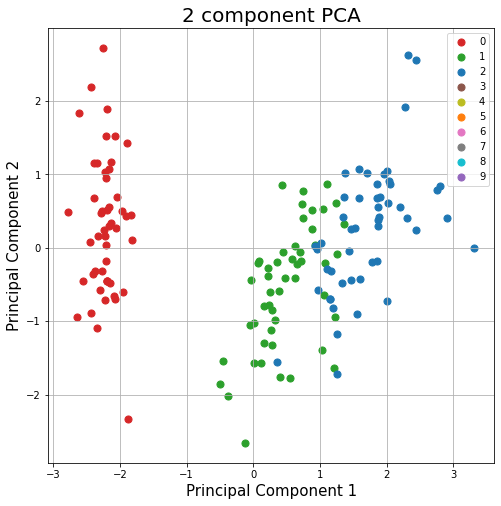

In [13]:
do_pca(x, targets)

In [14]:
#normalize the columns of x (i think...)
x = x/(np.expand_dims(np.linalg.norm(x, axis = 1), axis = 1))

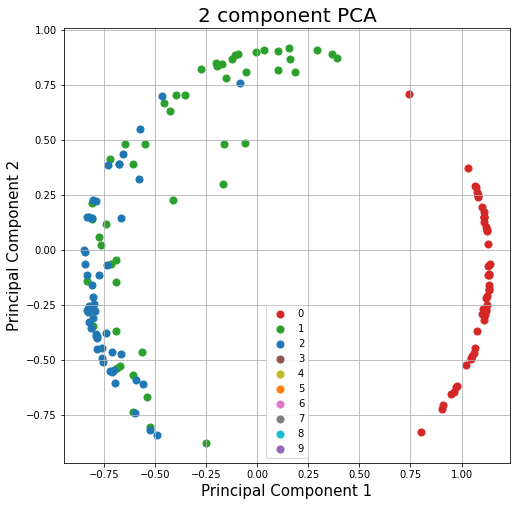

In [15]:
do_pca(x, targets)

150


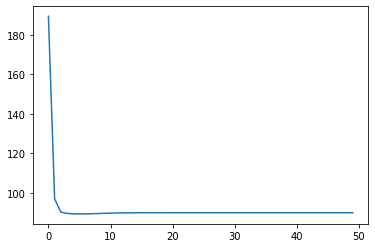

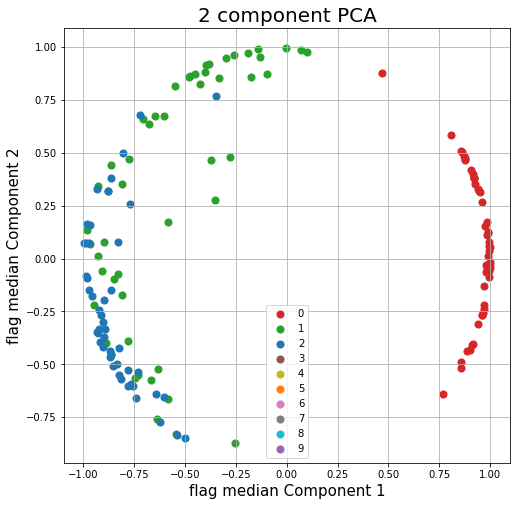

In [16]:
do_flag_median(x, targets)

In [17]:
import sklearn.datasets
pendigits = sklearn.datasets.load_digits()
# mnist = sklearn.datasets.fetch_openml('mnist_784')
# fmnist = sklearn.datasets.fetch_openml('Fashion-MNIST')

In [18]:
x = pendigits['data']
targets = pd.DataFrame(columns = ['target'], data = pendigits['target'])

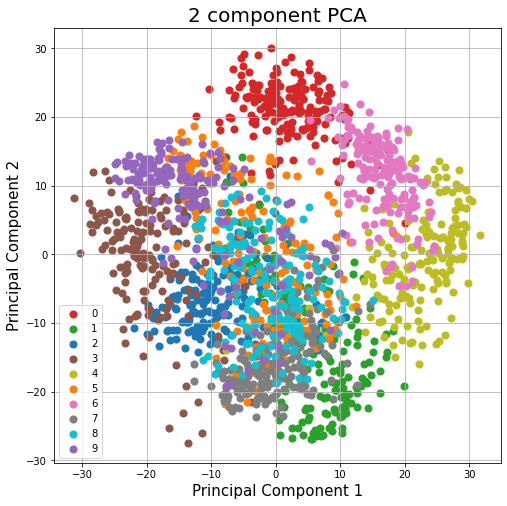

In [19]:
do_pca(x, targets)

In [20]:
#normalize the columns of x (i think...)
the_norms = np.expand_dims(np.linalg.norm(x, axis = 1), axis = 1)
the_norms[the_norms== 0]=1
new_x = x/(the_norms)

In [21]:
for i in range(new_x.shape[0]):
    if not np.isclose(np.linalg.norm(new_x[i,:]), 1):
        print('oops!')

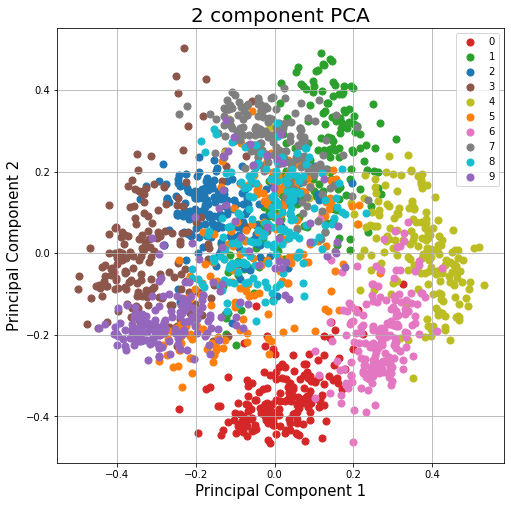

In [22]:
do_pca(new_x, targets)

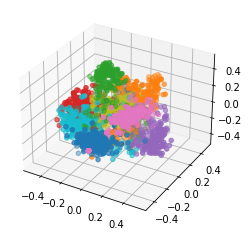

In [34]:
plt.ion()
do_3d_pca(new_x, targets)

1797


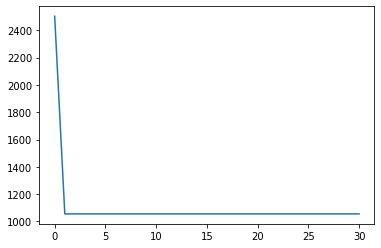

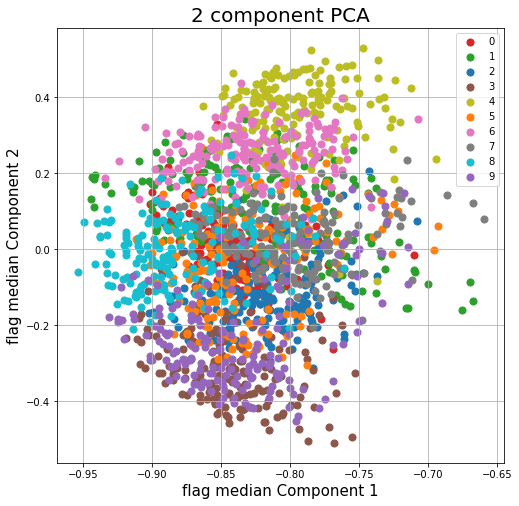

In [38]:
do_flag_median(new_x, targets)

1797


IndexError: index 2 is out of bounds for axis 1 with size 2

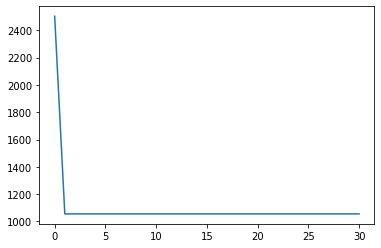

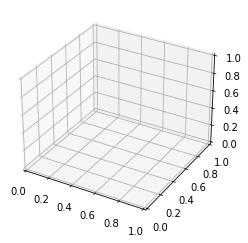

In [39]:
do_3d_flag_median(new_x, targets)